In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

In [4]:
train_bene_df = pd.read_csv("train_bene_1.csv")


In [5]:
train_bene_df.shape

(138556, 28)

In [6]:
train_bene_df.columns

Index(['Unnamed: 0', 'BeneID', 'DOB', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age_Year',
       'Patient_Age_Month', 'Dead_or_Alive', 'AGE', 'AGE_groups'],
      dtype='object')

In [7]:
train_bene_df.dtypes

Unnamed: 0                           int64
BeneID                              object
DOB                                 object
Gender                               int64
Race                                 int64
RenalDiseaseIndicator               object
State                                int64
County                               int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualReimbursementAmt             int64
OPAnnualDeductibleAmt                int64
Patient_Age

In [8]:
train_bene_df.head()

,Unnamed: 0,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age_Year,Patient_Age_Month,Dead_or_Alive,AGE,AGE_groups
0,0,BENE11001,1943-01-01,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,1943,1,0,67.0,Old
1,1,BENE11002,1936-09-01,0,1,0,39,280,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1936,9,0,73.3,Old
2,2,BENE11003,1936-08-01,1,1,0,52,590,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,1936,8,0,73.4,Old
3,3,BENE11004,1922-07-01,1,1,0,39,270,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1922,7,0,87.5,Very Old
4,4,BENE11005,1935-09-01,1,1,0,24,680,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,1935,9,0,74.3,Old


How many unique beneficiaries we have in our dataset?

In [9]:
train_bene_df['BeneID'].nunique()

138556

In [13]:
train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'], format="%Y-%m-%d")

In [14]:
train_bene_df['Patient_Age_Year'] = train_bene_df['DOB'].dt.year
train_bene_df['Patient_Age_Month'] = train_bene_df['DOB'].dt.month

In [15]:
bene_age_year_df = pd.DataFrame(train_bene_df['Patient_Age_Year'].value_counts()).reset_index(drop=False)
bene_age_year_df.columns= ['year','num_of_beneficiaries']
bene_age_year_df = bene_age_year_df.sort_values(by='year')

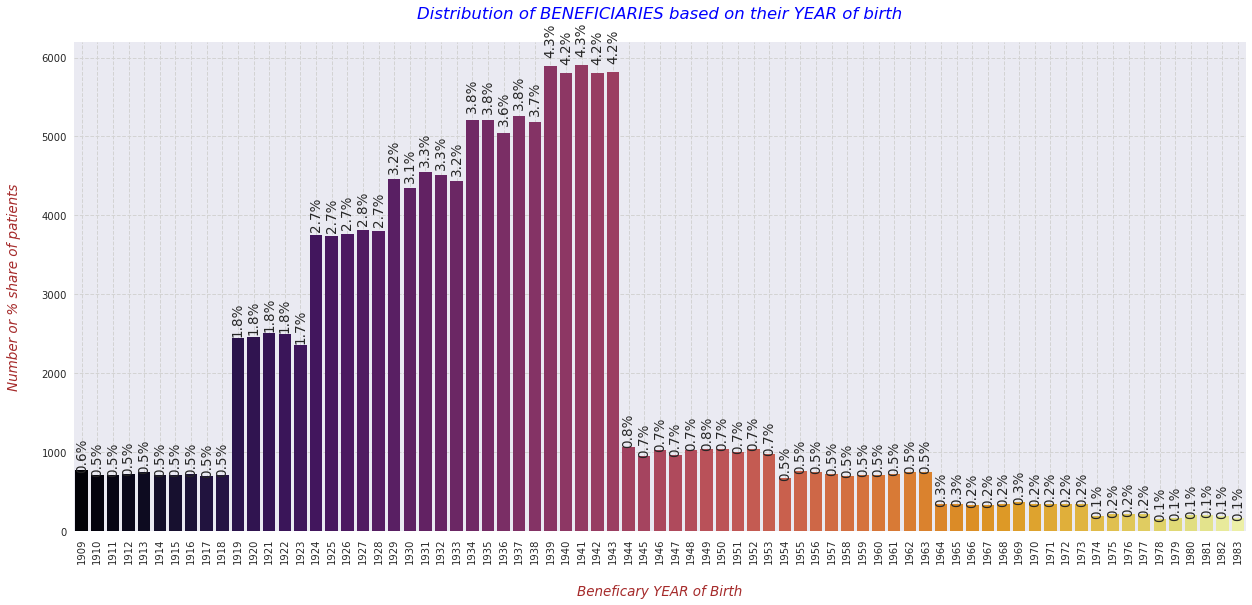

In [30]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(21,9))
  fig = sns.barplot(data=bene_age_year_df, x='year', y='num_of_beneficiaries', palette='inferno')
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
  plt.xlabel("\nBeneficary YEAR of Birth", fontdict=label_font_dict)
  plt.xticks(rotation=90)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.title("Distribution of BENEFICIARIES based on their YEAR of birth\n", fontdict=title_font_dict)

In [20]:
bene_age_month_df = pd.DataFrame(train_bene_df['Patient_Age_Month'].value_counts()).reset_index(drop=False)
bene_age_month_df.columns= ['month','num_of_beneficiaries']
bene_age_month_df = bene_age_month_df.sort_values(by='month')

In [22]:
pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())

,BeneID
ChronicCond_Cancer,
1,16621
2,121935


In [23]:
CC_CN_IP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['IPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_IP_R.columns = ['AVG IP Reimbursement Amt']
CC_CN_IP_R

,AVG IP Reimbursement Amt
ChronicCond_Cancer,
1,6067.532038
2,3332.222250


In [24]:
CC_CN_OP_R = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['OPAnnualReimbursementAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_OP_R.columns = ['AVG OP Reimbursement Amt']
CC_CN_OP_R

,AVG OP Reimbursement Amt
ChronicCond_Cancer,
1,1788.427291
2,1231.398942


In [25]:
CC_CN_IP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['IPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_IP_D.columns = ['AVG IP Co-payment Amt']
CC_CN_IP_D

,AVG IP Co-payment Amt
ChronicCond_Cancer,
1,636.339811
2,367.610924


In [26]:
CC_CN_OP_D = pd.DataFrame(train_bene_df.groupby(['ChronicCond_Cancer'])['OPAnnualDeductibleAmt'].sum() / train_bene_df.groupby(['ChronicCond_Cancer'])['BeneID'].count())
CC_CN_OP_D.columns = ['AVG OP Co-payment Amt']
CC_CN_OP_D

,AVG OP Co-payment Amt
ChronicCond_Cancer,
1,520.832682
2,358.210284


In [27]:
CC_CN_all_amts = pd.concat([CC_CN_IP_R, CC_CN_OP_R, CC_CN_IP_D, CC_CN_OP_D], axis=1)
CC_CN_all_amts

,AVG IP Reimbursement Amt,AVG OP Reimbursement Amt,AVG IP Co-payment Amt,AVG OP Co-payment Amt
ChronicCond_Cancer,,,,
1,6067.532038,1788.427291,636.339811,520.832682
2,3332.222250,1231.398942,367.610924,358.210284


                    AVG IP Reimbursement Amt  AVG OP Reimbursement Amt  \
ChronicCond_Cancer                                                       
1                                6067.532038               1788.427291   
2                                3332.222250               1231.398942   

                    AVG IP Co-payment Amt  AVG OP Co-payment Amt  
ChronicCond_Cancer                                                
1                              636.339811             520.832682  
2                              367.610924             358.210284   



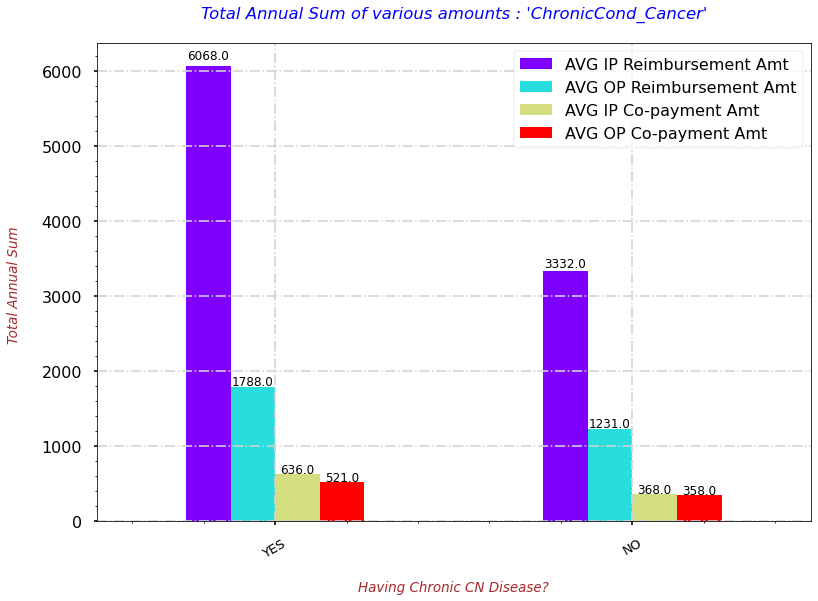

In [29]:
with plt.style.context('seaborn-poster'):
  fig = CC_CN_all_amts.plot(kind='bar', colormap='rainbow')
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{round(height,0)}', (x + width/2, y + height*1.015), ha='center', fontsize=12, rotation=0)
  # Providing the labels and title to the graph
  plt.xlabel("\nHaving Chronic CN Disease?", fontdict=label_font_dict)
  plt.xticks(ticks=[0,1], labels=['YES', 'NO'], fontsize=13, rotation=30)
  plt.ylabel("Total Annual Sum \n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="-.", color='lightgrey')
  plt.minorticks_on()
  plt.title("Total Annual Sum of various amounts : 'ChronicCond_Cancer'\n", fontdict=title_font_dict)


print(CC_CN_all_amts,"\n")